In [1]:
#First we are going to load in the needed programs
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy import signal
from scipy import stats
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from math import nan
import math 
import ast
from numpy import mean


from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.neighbors import KernelDensity
from scipy.misc import derivative

<h2> To quantify the correlations as a function of distances on single-chromosomes </h2>


In [ ]:
#Here I am going to normalize by the maximal correlation coefficent, each one. 
from scipy import stats

file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values

data = {'Other Gene': [], 'Spear': []}
dfn= pd.DataFrame.from_dict(data)


for i in range(651):
        clear_output(wait=True)
        print(i)
        data = {'Other Gene': [], 'Spear': []}
        dfn= pd.DataFrame.from_dict(data)


        file='Transcription_Trajectories/Test'+str(i)+'.npy'
        trans=np.load(file)

        if np.nansum(trans)>0:

            file="Distances/Distances_"+str(i)
            df=pd.read_csv(file)

            for ii in range(651): 

                    file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                    trans2=np.load(file)

                    if np.nansum(trans2)>0 and np.abs(i-ii)>0:
                            tensi=[]

                            for dis_2 in range(1, 40, 2): 
                                inds1=np.abs(df['barcode'+str(ii)]-dis_2*100)<100
                                if np.sum(inds1)>10:

                                    transtemp1=np.copy(trans)
                                    transtemp2=np.copy(trans2)

                                    transtemp1=transtemp1[inds1]
                                    transtemp2=transtemp2[inds1]

                                    if np.nansum(transtemp1)>2 and np.nansum(transtemp2)>2:


                                        #print(np.sum(inds1))

                                        Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                        vv1=str(dis_2*100)
                                        #Hey2=stats.spearmanr(np.sort(transtemp1),  np.sort(transtemp2))[0]
                                        #vv1=str(dis_2*100)
                                        #Hey2=stats.spearmanr(np.sort(trans),  np.sort(trans2))[0]
                                        #vv1=str(dis_2*100)
                                        #dfn.loc[len(dfn.index)] = [dis_2*100/1000, Hey]
                                        tensi.append(Hey)
                                    else:
                                        tensi.append(nan)
                                        
                                        
                                else:
                                    tensi.append(nan)


                            dfn.loc[len(dfn.index)]=[ii, np.array(tensi)]
            
            dfn.to_pickle('Error_Calculation/True/'+str(i)+".pkl")        
        
        
    

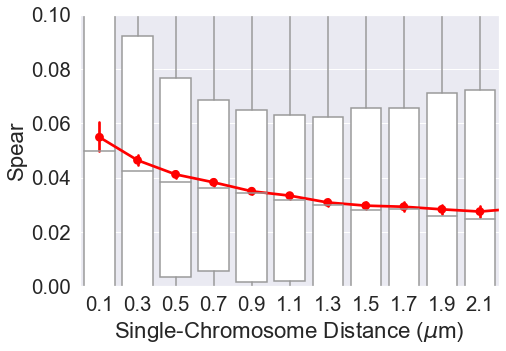

In [5]:
sns.set(font_scale=1.85)
fig=plt.figure()
df2=pd.read_pickle("Exp.pkl")
ax = sns.boxplot(x='Single-Chromosome Distance ($\mu$m)', y='Spear',
                    data=df2, color='white')
#print(un)

ax=sns.pointplot(x='Single-Chromosome Distance ($\mu$m)', y='Spear',
                    data=df2, estimator=mean,color='red')
#plt.legend(loc='upper left',fontsize=15)
fig.set_size_inches(7.5,5)
plt.xlim(-.5,10.5)
plt.ylim(0,.1)
plt.show()
#fig.savefig("Figures/Sim/"+str(un)+"Physical_Distance.png", dpi=300, bbox_inches='tight')
fig.savefig("Figures/Exp_Physical_Distance.png", dpi=300, bbox_inches='tight')

<h2> Quantify how burst freq varies as distance between genes </h2> 

In [ ]:
#I need to make sure that expression levels of genes do not vary as a function of the distance between them. This is the code to do that
#Here I am going to normalize by the average correlation coefficent of each one independent of the distance. 
from scipy import stats

file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)
Med=ff.values

data = {'Single-Chromosome Distance ($\mu$m)': [], '<nRNA(i|dis(i,j))>/<nRNA(i)>': []}
dfn= pd.DataFrame.from_dict(data)
#dfn.loc[len(dfn.index)]


for i in range(651):
        clear_output(wait=True)
        print(i)


        file='Transcription_Trajectories/Test'+str(i)+'.npy'
        trans=np.load(file)

        if np.nansum(trans)>0:

            file="Distances/Distances_"+str(i)
            df=pd.read_csv(file)

            for ii in range(651): 

                    file='Transcription_Trajectories/Test'+str(ii)+'.npy'
                    trans2=np.load(file)

                    if np.nansum(trans2)>0 and np.abs(i-ii)>0:

                               for dis_2 in range(1, 40, 2): 
                                inds1=np.abs(df['barcode'+str(ii)]-dis_2*100)<100
                                if np.sum(inds1)>100:

                                    transtemp1=np.copy(trans)
                                    transtemp2=np.copy(trans2)

                                    transtemp1=transtemp1[inds1]
                                    transtemp2=transtemp2[inds1]
                                    
                                    if np.nansum(transtemp1)>0 and np.nansum(transtemp2)>0:
                                        
                                        dfn.loc[len(dfn.index)] = [dis_2*100/1000, np.nanmean(transtemp1)/np.nanmean(trans)]
                                        dfn.loc[len(dfn.index)] = [dis_2*100/1000, np.nanmean(transtemp2)/np.nanmean(trans2)]

                                        Hey=stats.spearmanr(transtemp1,  transtemp2)[0]
                                        vv1=str(dis_2*100)
                                        Hey2=stats.spearmanr(np.sort(transtemp1),  np.sort(transtemp2))[0]
                                        vv1=str(dis_2*100)
                                        

In [ ]:
sns.set(font_scale=1.85)
fig=plt.figure()
ax = sns.boxplot(x='Single-Chromosome Distance ($\mu$m)', y='<nRNA(i|dis(i,j))>/<nRNA(i)>',
                    data=dfn, color='white')

ax=sns.pointplot(x='Single-Chromosome Distance ($\mu$m)', y='<nRNA(i|dis(i,j))>/<nRNA(i)>',
                    data=dfn, estimator=mean,color='black')

fig.set_size_inches(7.5,5)
plt.xlim(-.5,10.5)
plt.ylim(0,2.5)

fig.savefig("Figures/"+"Bursting_Freq_Physical_Distance.png", dpi=300, bbox_inches='tight')